In [22]:
!jt -t monokai
#Must use !jt for theme 

In [4]:
import tensorflow as tf
import matplotlib
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from ipywidgets import FileUpload
from keras.datasets import cifar10
from skimage.transform import resize



#https://www.cs.toronto.edu/~kriz/cifar.html
#https://www.kaggle.com/c/cifar-10
#https://www.tensorflow.org/datasets/catalog/cifar10
#https://www.tensorflow.org/tutorials/load_data/images

In [2]:
# Get the version number 
print('\n'.join(f'{m.__name__} {m.__version__}' 
      for m in globals().values() if getattr(m, '__version__', None)))

tensorflow 2.4.0
matplotlib 3.3.2
ipywidgets 7.6.1
numpy 1.19.2
tensorflow.keras 2.4.0


In [3]:
#Loading the data 
#https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [4]:
#Checking the data type
print('\n',type(x_train),'\n',type(y_train),'\n',type(x_test),'\n',type(y_test))


 <class 'numpy.ndarray'> 
 <class 'numpy.ndarray'> 
 <class 'numpy.ndarray'> 
 <class 'numpy.ndarray'>


In [5]:
#Understanding the shape of the dataset by getting the shape of the array
print('\n','x_train shape', x_train.shape,'\n','y_train shape', y_train.shape,'\n',
      'x_test shape', x_test.shape,'\n','y_test shape', y_test.shape)


 x_train shape (50000, 32, 32, 3) 
 y_train shape (50000, 1) 
 x_test shape (10000, 32, 32, 3) 
 y_test shape (10000, 1)


In [6]:
#Take a look at the first image as an array, there's no picture since its dtype
index =30
x_train[index]


array([[[126, 118, 110],
        [122, 115, 108],
        [126, 119, 111],
        ...,
        [124, 118, 106],
        [120, 114, 102],
        [117, 111,  99]],

       [[122, 115, 107],
        [119, 112, 104],
        [121, 114, 106],
        ...,
        [124, 118, 106],
        [122, 116, 104],
        [117, 111,  99]],

       [[122, 115, 107],
        [121, 114, 106],
        [121, 114, 106],
        ...,
        [126, 120, 108],
        [123, 117, 105],
        [121, 115, 103]],

       ...,

       [[126, 118, 107],
        [126, 118, 107],
        [128, 120, 109],
        ...,
        [133, 125, 114],
        [122, 114, 103],
        [114, 106,  95]],

       [[125, 117, 106],
        [126, 118, 107],
        [127, 119, 108],
        ...,
        [128, 120, 109],
        [121, 113, 102],
        [114, 106,  95]],

       [[123, 115, 104],
        [123, 115, 104],
        [126, 118, 107],
        ...,
        [128, 119, 109],
        [126, 118, 107],
        [121, 113, 102]]

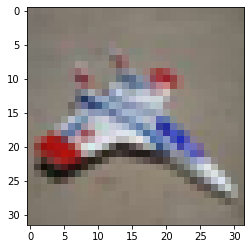

In [7]:
#Coverting it to an actual image
#Its seem like a very bad image
img = plt.imshow(x_train[index])

In [8]:
print('The image label is:', y_train[index])

The image label is: [0]


In [9]:
classification =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('The image class is: ', classification[y_train[index][0]])

The image class is:  airplane


In [10]:
#Converting the labels into a set of 10 numbers to input into the nerual network
y_train_one_hot= to_categorical(y_train)
y_test_one_hot= to_categorical(y_test)

In [11]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
#The new label of the images
# The hot label the index with a one
#which mean thats the images is mostly that label
print("hot label: ",y_train_one_hot[index])

hot label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train/255
x_test = x_test /255

In [14]:
# The values below between zero and 1 
# we need this for the model artchitercture also known as the sequential model
x_train[index]

array([[[0.49411765, 0.4627451 , 0.43137255],
        [0.47843137, 0.45098039, 0.42352941],
        [0.49411765, 0.46666667, 0.43529412],
        ...,
        [0.48627451, 0.4627451 , 0.41568627],
        [0.47058824, 0.44705882, 0.4       ],
        [0.45882353, 0.43529412, 0.38823529]],

       [[0.47843137, 0.45098039, 0.41960784],
        [0.46666667, 0.43921569, 0.40784314],
        [0.4745098 , 0.44705882, 0.41568627],
        ...,
        [0.48627451, 0.4627451 , 0.41568627],
        [0.47843137, 0.45490196, 0.40784314],
        [0.45882353, 0.43529412, 0.38823529]],

       [[0.47843137, 0.45098039, 0.41960784],
        [0.4745098 , 0.44705882, 0.41568627],
        [0.4745098 , 0.44705882, 0.41568627],
        ...,
        [0.49411765, 0.47058824, 0.42352941],
        [0.48235294, 0.45882353, 0.41176471],
        [0.4745098 , 0.45098039, 0.40392157]],

       ...,

       [[0.49411765, 0.4627451 , 0.41960784],
        [0.49411765, 0.4627451 , 0.41960784],
        [0.50196078, 0

https://www.geeksforgeeks.org/keras-conv2d-class/

The first layer will be a convolution layer to extract features 
from the input image and then it will create 32 5x5 ray Lu 
convolutedfeatures or feature Maps.

The second layer which is the pooling layer:
progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, but in this case we're using it to calculates the maximum, or largest, value in each patch of each feature map.

The flatten layer reduce it to a linear array



In [15]:

#Creating the model architercture
model = Sequential()
#add the first layer 
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
#Adding a pooling layer 
model.add(MaxPooling2D(pool_size = (2,2)))
#Add another convolution layer, we don't need the input_shape since its not the first layer 
model.add( Conv2D(32,(5,5), activation ='relu'))
#Adding another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# With every Conv2D layer we're going to add a MaxPooling 2D layer
#Now we're adding a flattening layer to make it into a linear array
model.add(Flatten())
#----------------------------------
#Adding a layer with 1000 neruons
model.add(Dense(1000,activation='relu'))
# Add a drop out layer
model.add(Dropout(0.5))
#----------------------------------
#Adding a layer with 2000 neruons
model.add(Dense(500,activation='relu'))
# Add a drop out layer
model.add(Dropout(0.5))
#---------------------------------
model.add(Dense(250,activation='relu'))
#---------------------------------
model.add(Dense(10,activation='softmax'))


In [16]:
#Compiling the model
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [17]:
hist = model.fit(x_train, y_train_one_hot, 
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 49s 305ms/step - loss: 2.0391 - accuracy: 0.2263 - val_loss: 1.4966 - val_accuracy: 0.4502
Epoch 2/10
157/157 [==============================] - 46s 291ms/step - loss: 1.4508 - accuracy: 0.4657 - val_loss: 1.2547 - val_accuracy: 0.5482
Epoch 3/10
157/157 [==============================] - 46s 291ms/step - loss: 1.2606 - accuracy: 0.5462 - val_loss: 1.2633 - val_accuracy: 0.5604
Epoch 4/10
157/157 [==============================] - 46s 292ms/step - loss: 1.1553 - accuracy: 0.5837 - val_loss: 1.0972 - val_accuracy: 0.6111
Epoch 5/10
157/157 [==============================] - 46s 293ms/step - loss: 1.0700 - accuracy: 0.6170 - val_loss: 1.0680 - val_accuracy: 0.6211
Epoch 6/10
157/157 [==============================] - 46s 294ms/step - loss: 0.9978 - accuracy: 0.6475 - val_loss: 0.9665 - val_accuracy: 0.6573
Epoch 7/10
157/157 [==============================] - 46s 293ms/step - loss: 0.9380 - accuracy: 0.6651 - val_loss: 0.9611 - val_ac

In [18]:
#Getting the accuracy 
model.evaluate(x_test, y_test_one_hot)[1]


313/313 [==============================] - 6s 18ms/step - loss: 0.9937 - accuracy: 0.6659


0.6658999919891357

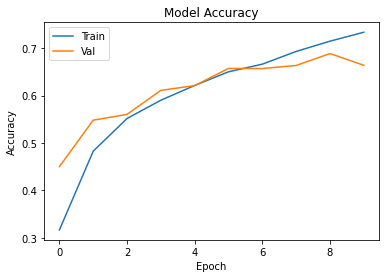

In [19]:
#Visualize the models  accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

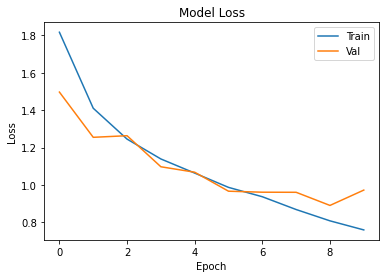

In [20]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [21]:
from ipywidgets import FileUpload

def on_upload_change(change):
    if not change.new:
        return
    up = change.owner
    for filename,data in up.value.items():
        print(f'writing [{filename}] to ./')
        with open(filename, 'wb') as f:
            f.write(data['content'])
    up.value.clear()
    up._counter = 0

upload_btn = FileUpload()
upload_btn.observe(on_upload_change, names='_counter')
upload_btn
#https://stackoverflow.com/questions/39495994/uploading-files-using-browse-button-in-jupyter-and-using-saving-them

FileUpload(value={}, description='Upload')

writing [german_shepherd.jpg] to ./
writing [cat.jpg] to ./
writing [airplane.jpg] to ./
writing [TeslaRoadster_gen2.jpg] to ./
writing [hawk.jpg] to ./


In [22]:
#Checking the button values
upload_btn.value

{}

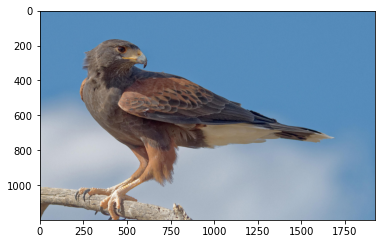

In [58]:
#Displaying the image using imread
new_image = plt.imread('hawk.jpg')
image=plt.imshow(new_image)

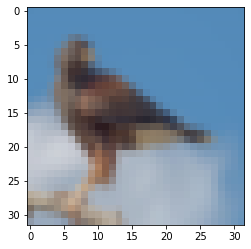

In [59]:
#Resizing the images using skimage.transform
resized_image = resize(new_image,(32,32,3))
img = plt.imshow(resized_image)


In [60]:
# get the model predictions 
predictions = model.predict(np.array([resized_image]))
#Show the predictions 
predictions

array([[2.0152343e-02, 1.2878572e-04, 8.0043769e-01, 8.2308806e-02,
        2.0904001e-02, 5.7118647e-02, 8.9229848e-03, 5.3449958e-03,
        4.2864163e-03, 3.9534454e-04]], dtype=float32)

In [61]:
#Sorting the predictions to get the highest values 
sorts = [0,1,2,3,4,5,6,7,8,9]
pred = predictions 

for i in range(10):
    for j in range(10):
        if pred[0][sorts[i]]> pred[0][sorts[j]]:
            temp = sorts[i]
            sorts[i] = sorts[j]
            sorts[j] = temp
            
print(sorted)

<built-in function sorted>


In [62]:
#Showing the percentage of the top 3
for i in range (3):
    print(classification[sorts[i]],':', round(predictions[0][sorts[i]]*100,2),'%')

bird : 80.04 %
cat : 8.23 %
dog : 5.71 %


     The label for this image is: bird


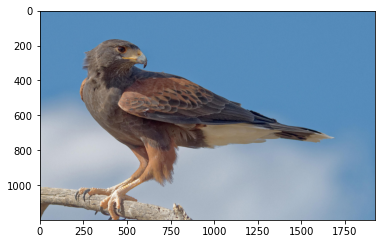

In [67]:
#Displaying the image label:
print("     The label for this image is:",
      classification[sorts[0]])
image=plt.imshow(new_image)